In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
#base_loc = '/Users/renatb/'
base_loc = '/Users/rbekbolatov/'
loc = base_loc + 'data/wesmckinney/names/'
years = range(1880, 2011)

pieces = []
columns = ['name', 'sex', 'births']

for year in years:
    path = loc + 'yob%d.txt' % year
    frame = pd.read_csv(path, names=columns)
    frame['year'] = year
    pieces.append(frame)

names = pd.concat(pieces, ignore_index=True)

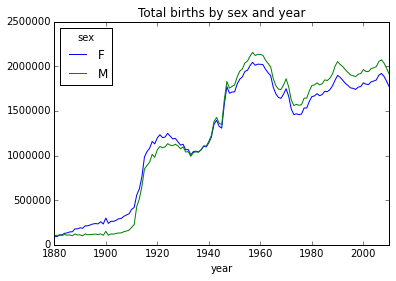

In [3]:
# get aggregates by year and sex
total_births = names.pivot_table('births', index='year', columns='sex', aggfunc=sum)
total_births.plot(title='Total births by sex and year')

In [4]:
# add proportion
def add_proportion(group):
    births = group.births.astype(float)
    group['prop'] = births / births.sum()
    return group
names = names.groupby(['year', 'sex']).apply(add_proportion)

In [5]:
# make sure adds up to 1
np.allclose(names.groupby(['year', 'sex']).prop.sum(), 1)

True

In [6]:
def get_top1000(group):
    return group.sort_index(by='births', ascending=False)[:1000]
grouped = names.groupby(['year', 'sex'])
top1000 = grouped.apply(get_top1000)
top1000.index = np.arange(len(top1000))

In [7]:
boys = top1000[top1000.sex == 'M']
girls = top1000[top1000.sex == 'F']
total_births = top1000.pivot_table('births', index='year', columns='name', aggfunc=sum)
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6869 entries, Aaden to Zuri
dtypes: float64(6869)
memory usage: 6.9 MB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x118018190>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x118ab0d50>], dtype=object)

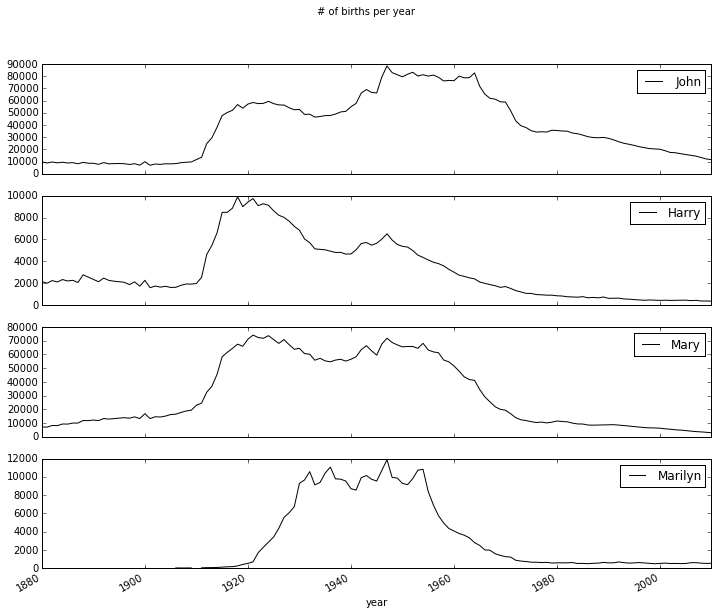

In [8]:
#top1000[(top1000.name == 'John') & (top1000.sex == 'M')]
subset = total_births[['John', 'Harry', 'Mary', 'Marilyn']]
subset.plot(subplots=True, figsize=(12, 10), grid=False, title='# of births per year')

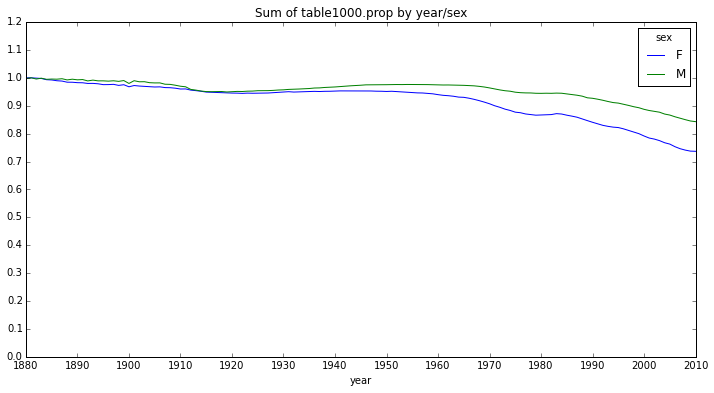

In [9]:
table = top1000.pivot_table('prop', index='year', columns='sex', aggfunc=sum)
table.plot(title='Sum of table1000.prop by year/sex',
           figsize=(12, 6),
           yticks=np.linspace(0, 1.2, 13),
           xticks=range(1880, 2020, 10))

In [10]:
df = boys[boys.year == 2010]
prop_cumsum = df.sort_index(by='prop', ascending=False).prop.cumsum()
prop_cumsum.values.searchsorted(0.5)

116

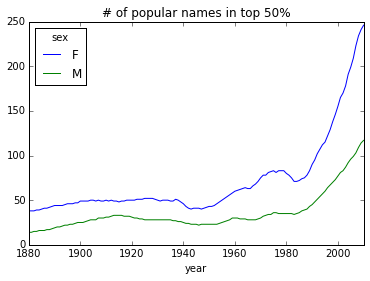

In [11]:
def get_quantile_count(group, q=0.5):
    group = group.sort_index(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1
diversity = top1000.groupby(['year', 'sex']).apply(get_quantile_count)
diversity = diversity.unstack('sex')
diversity.plot(title='# of popular names in top 50%')

In [12]:
get_last_letter = lambda x: x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = 'last_letter'

table = names.pivot_table('births', index=last_letters, columns=['sex', 'year'], aggfunc=sum)

In [13]:
subtable = table.reindex(columns=[1910, 1960, 2010], level='year')
subtable.head()

sex               F                      M                
year           1910    1960    2010   1910    1960    2010
last_letter                                               
a            108397  691245  675901    977    5214   28814
b               NaN     694     454    411    3912   39208
c                 5      49     953    482   15466   23307
d              6751    3728    2635  22113  262143   44758
e            133601  435048  316288  28665  178810  130073

In [14]:
subtable.sum()

sex  year
F    1910     396501
     1960    2022093
     2010    1772738
M    1910     194218
     1960    2132717
     2010    1913851
dtype: float64

In [15]:
letter_prop = subtable / subtable.sum().astype(float)

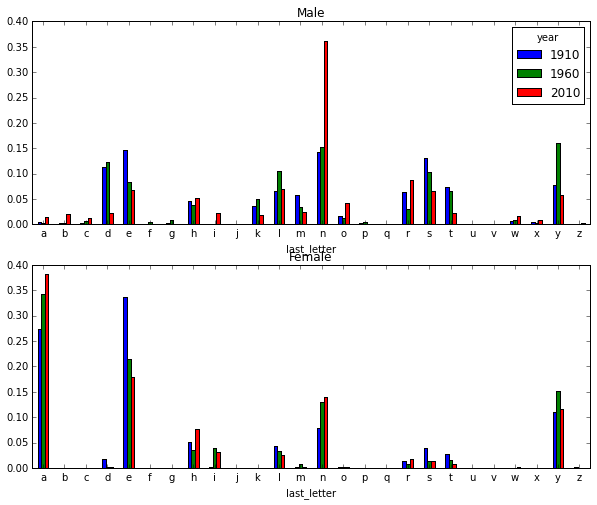

In [16]:
fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax = axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax = axes[1], title='Female', legend=False)

In [17]:
letter_prop = table/ table.sum().astype(float)
dny_ts = letter_prop.ix[['d', 'n', 'y'], 'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083057,0.153216,0.075762
1881,0.083240,0.153209,0.077453
1882,0.085339,0.149558,0.077537
1883,0.084059,0.151650,0.079146
1884,0.086120,0.149924,0.080405


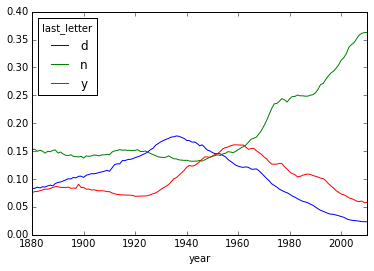

In [18]:
dny_ts.plot()

In [19]:
all_names = top1000.name.unique()
mask = np.array(['lesl' in x.lower() for x in all_names])
lesley_like = all_names[mask]
lesley_like

array(['Leslie', 'Lesley', 'Leslee', 'Lesli', 'Lesly'], dtype=object)

In [20]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby('name').births.sum()

name
Leslee      1082
Lesley     35032
Lesli        929
Leslie    370521
Lesly      10070
Name: births, dtype: int64

In [21]:
table = filtered.pivot_table('births', index='year', columns='sex', aggfunc=sum)
table = table.div(table.sum(1), axis=0)

In [22]:
table.tail()

sex,F,M
year,,
2006,1,NaN
2007,1,NaN
2008,1,NaN
2009,1,NaN
2010,1,NaN


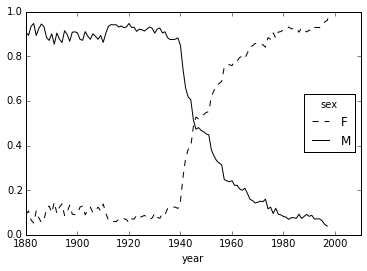

In [23]:
table.plot(style={'M': 'k-', 'F': 'k--'})

In [24]:
print('hello')

hello
